In [ ]:
import pandas as pd
import numpy as np
import os
import sys
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
# to play the audio files
from IPython.display import Audio
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download ejlok1/toronto-emotional-speech-set-tess

 96% 409M/428M [00:04<00:00, 124MB/s]
100% 428M/428M [00:04<00:00, 95.2MB/s]


In [ ]:
! unzip toronto-emotional-speech-set-tess

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/TESS Toronto emotional speech set data/YAF_angry/YAF_keep_angry.wav',
 '/content/TESS Toronto emotional speech set data/YAF_angry/YAF_merge_angry.wav',
 '/content/TESS Toronto emotional speech set data/YAF_angry/YAF_half_angry.wav',
 '/content/TESS Toronto emotional speech set data/YAF_angry/YAF_pike_angry.wav',
 '/content/TESS Toronto emotional speech set data/YAF_angry/YAF_shawl_angry.wav']

In [ ]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

Creating Data Frame

In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/TESS Toronto emotional speech set dat...,angry
1,/content/TESS Toronto emotional speech set dat...,angry
2,/content/TESS Toronto emotional speech set dat...,angry
3,/content/TESS Toronto emotional speech set dat...,angry
4,/content/TESS Toronto emotional speech set dat...,angry


In [ ]:
df['label'].value_counts()

angry      400
fear       400
sad        400
ps         400
happy      400
disgust    400
neutral    400
Name: label, dtype: int64

Exploratory Data Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


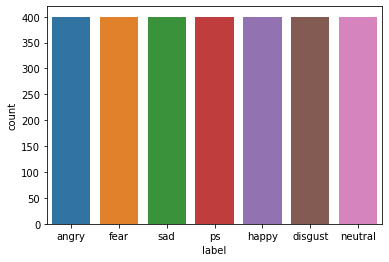

In [ ]:
sns.countplot(df['label'])

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

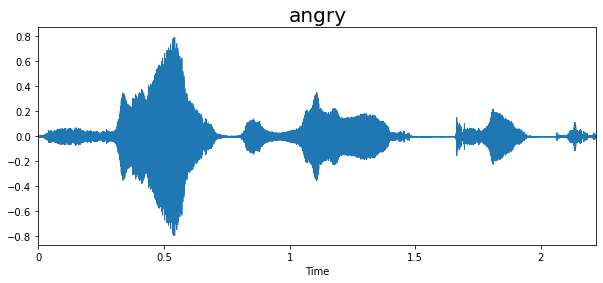

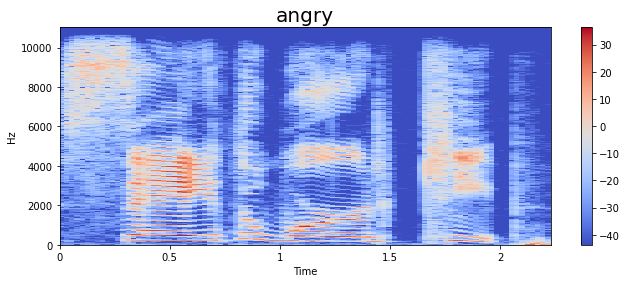

In [ ]:
emotion = 'angry'
path = df['speech'][df['label']==emotion][0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

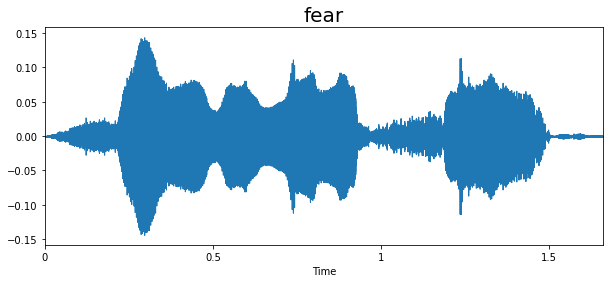

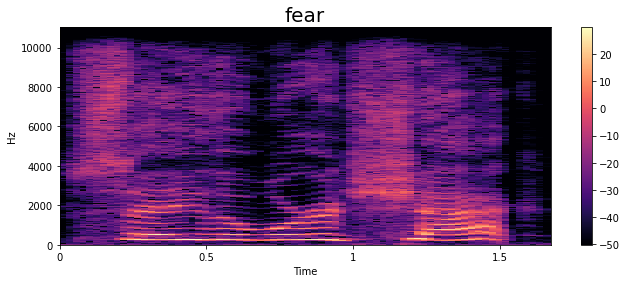

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

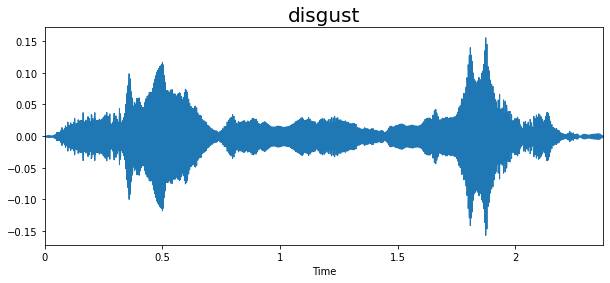

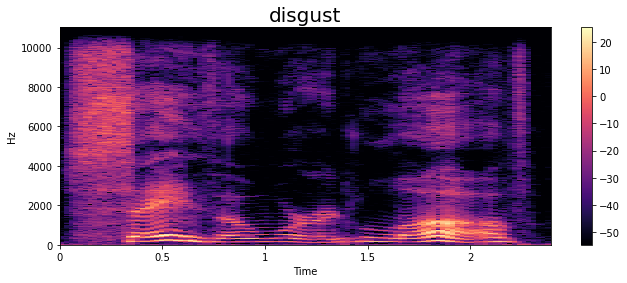

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

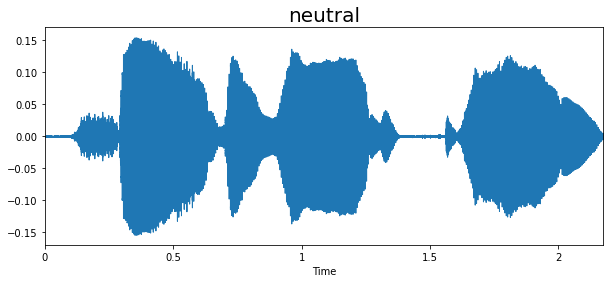

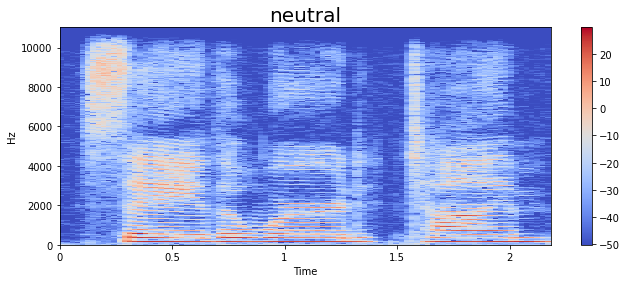

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

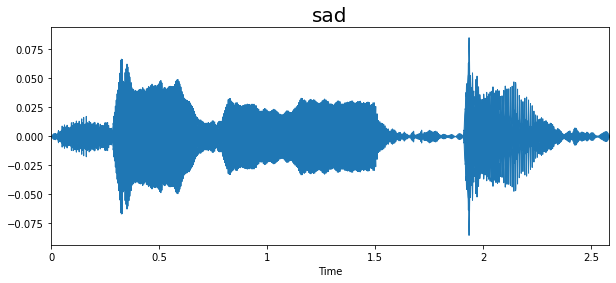

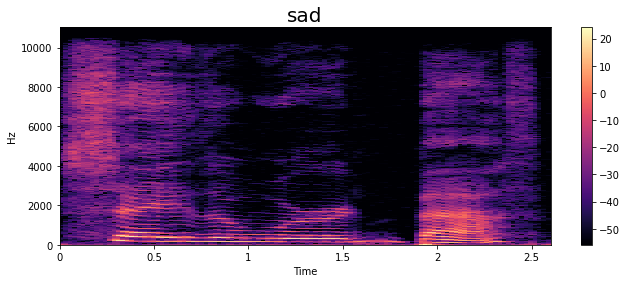

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

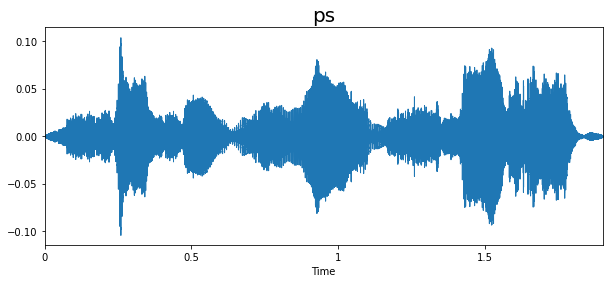

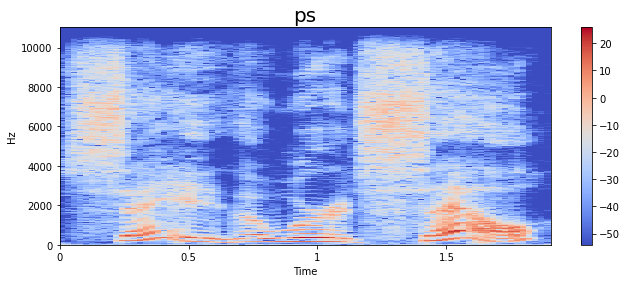

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

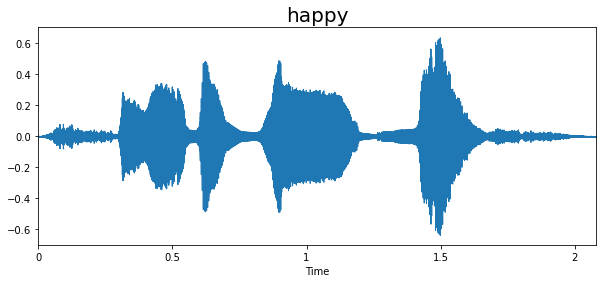

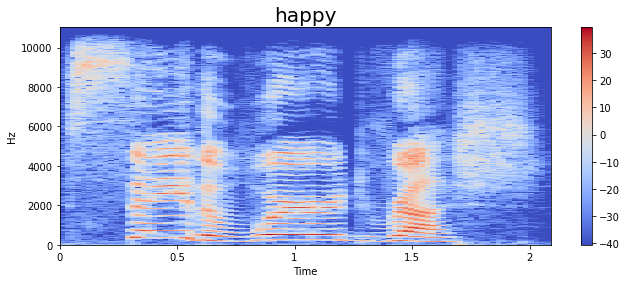

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-3.6530600e+02,  4.6391434e+01, -2.5379293e+00,  3.3134365e+01,
       -2.2135931e+01,  2.5071635e+00,  1.2276255e+00, -1.9990740e+01,
       -7.3054948e+00, -3.1697285e+00, -2.0596930e+01,  9.2590313e+00,
       -1.6386530e+01,  9.0117617e+00, -1.6771319e+00, -5.3040295e+00,
       -6.1306471e-01, -2.2014979e-01, -8.6614285e+00,  8.8530058e-01,
       -6.0989332e+00,  1.3437443e+00, -5.8444328e+00, -1.1220145e+00,
       -3.7624223e+00,  2.7647212e+00,  4.3638892e+00,  1.4018619e+01,
        1.2045163e+01,  1.5072484e+01,  6.5701394e+00,  1.0413039e+01,
        4.1737428e+00,  6.2758632e+00, -8.3922648e-01,  8.9323181e-01,
       -6.6080141e-01,  2.7178047e+00,  5.8042198e-01,  1.6973615e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-365.306, 46.391434, -2.5379293, 33.134365, -...
1       [-304.82962, 47.28285, -22.821785, 7.9621964, ...
2       [-323.38895, 50.73557, -28.324034, 6.487664, -...
3       [-337.72208, 47.823406, -18.093235, 22.024885,...
4       [-294.11227, 55.699528, -25.664833, 18.877495,...
                              ...                        
2795    [-521.7396, 85.6126, 24.44755, 17.665335, 17.9...
2796    [-537.1364, 87.382355, 20.465075, 10.602875, 2...
2797    [-505.49588, 92.634224, 14.097998, -1.1385345,...
2798    [-562.25287, 103.10744, 22.37382, 13.060725, 2...
2799    [-565.9862, 113.85587, 36.862896, 19.702028, 8...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])


In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

Creating the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 9s 177ms/step - loss: 1.3395 - accuracy: 0.4558 - val_loss: 2.7452 - val_accuracy: 0.0339
Epoch 2/50
35/35 [==============================] - 6s 161ms/step - loss: 0.7362 - accuracy: 0.7246 - val_loss: 0.9022 - val_accuracy: 0.7857
Epoch 3/50
35/35 [==============================] - 6s 160ms/step - loss: 0.4016 - accuracy: 0.8670 - val_loss: 0.1662 - val_accuracy: 0.9911
Epoch 4/50
35/35 [==============================] - 6s 161ms/step - loss: 0.2565 - accuracy: 0.9246 - val_loss: 0.0756 - val_accuracy: 0.9839
Epoch 5/50
35/35 [==============================] - 6s 161ms/step - loss: 0.2272 - accuracy: 0.9277 - val_loss: 0.0540 - val_accuracy: 0.9982
Epoch 6/50
35/35 [==============================] - 6s 160ms/step - loss: 0.1923 - accuracy: 0.9393 - val_loss: 0.0886 - val_accuracy: 0.9821
Epoch 7/50
35/35 [==============================] - 6s 159ms/step - loss: 0.1488 - accuracy: 0.9585 - val_loss: 0.0448 - val_accuracy: 0.9946
Epoch 

In [ ]:
# best val accuracy: 99.82

Result Plotting

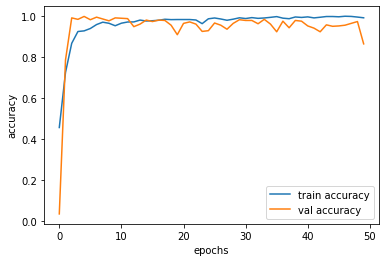

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

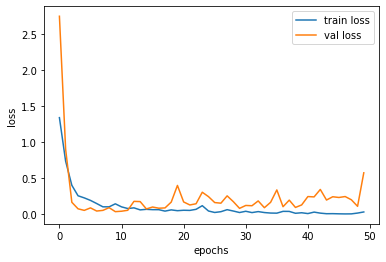

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Confusion Matrix

In [1]:
cm = confusion_matrix(X, y)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

NameError: ignored